In [43]:
import pandas as pd
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [28]:
data= pd.read_csv('data/test/kdtrain.csv')
data_test= pd.read_csv('data/test/kdtest.csv')

In [29]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,42.0,1.7,136.0,4.7,12.6,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,233.0,50.1,1.9,NaN,NaN,11.7,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,114.0,87.0,5.2,139.0,3.7,12.1,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,108.0,25.0,1.0,144.0,5.0,17.8,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,NaN,50.0,1.4,129.0,4.0,11.1,39.0,8300,4.6,yes,no,no,poor,no,no,ckd


##  Attribute Information:

We use 24 + class = 25 ( 11 numeric ,14 nominal)

    Age(numerical) - age in years
    Blood Pressure(numerical) - bp in mm/Hg
    Specific Gravity(nominal) - sg - (1.005,1.010,1.015,1.020,1.025)
    Albumin(nominal) - al - (0,1,2,3,4,5)
    Sugar(nominal) - su - (0,1,2,3,4,5)
    Red Blood Cells(nominal) - rbc - (normal,abnormal)
    Pus Cell (nominal) - pc - (normal,abnormal)
    Pus Cell clumps(nominal) - pcc - (present,notpresent)
    Bacteria(nominal) - ba - (present,notpresent)
    Blood Glucose Random(numerical) - bgr in mgs/dl
    Blood Urea(numerical) -bu in mgs/dl
    Serum Creatinine(numerical) - sc in mgs/dl
    Sodium(numerical) - sod in mEq/L
    Potassium(numerical) - pot in mEq/L
    Hemoglobin(numerical) - hemo in gms
    Packed Cell Volume(numerical)
    White Blood Cell Count(numerical) - wc in cells/cumm
    Red Blood Cell Count(numerical) - rc in millions/cmm
    Hypertension(nominal) - htn - (yes,no)
    Diabetes Mellitus(nominal) - dm - (yes,no)
    Coronary Artery Disease(nominal) - cad - (yes,no)
    Appetite(nominal) - appet - (good,poor)
    Pedal Edema(nominal) - pe - (yes,no)
    Anemia(nominal) - ane - (yes,no)
    Class (nominal)- class - (ckd,notckd)


In [30]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [31]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [32]:
data.isna().sum()

id                  0
age                 5
bp                  9
sg                 36
al                 35
su                 38
rbc               107
pc                 50
pcc                 4
ba                  4
bgr                33
bu                 14
sc                 12
sod                67
pot                68
hemo               39
pcv                51
wc                 77
rc                 93
htn                 1
dm                  1
cad                 1
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [63]:
#lets get started first with numeric columns
data.select_dtypes(exclude='object').columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv'],
      dtype='object')

In [33]:
data['age'].fillna(data['age'].median(),inplace=True)
data_test['age'].fillna(data['age'].median(),inplace=True)

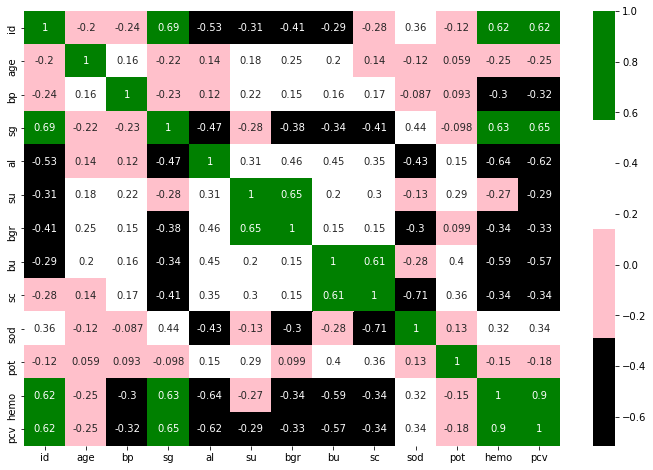

In [51]:
#Not much corelation between bp and any other column
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap=['black','pink','white','green'])

In [61]:
data['bp'].fillna(data['bp'].median(),inplace=True)
data_test['bp'].fillna(data['bp'].median(),inplace=True)


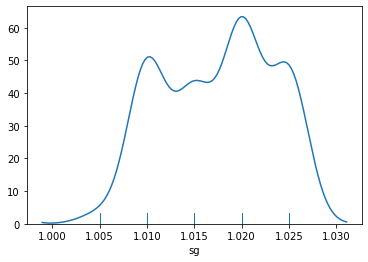

In [103]:
sns.distplot(data['sg'],hist=False,rug=True)

In [114]:
np.random.seed(2)
em= data[data['sg'].isna()]['sg'].index
f= np.random.choice([1.005,1.010,1.015,1.020,1.025],len(em))
data['sg'][em]= f

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


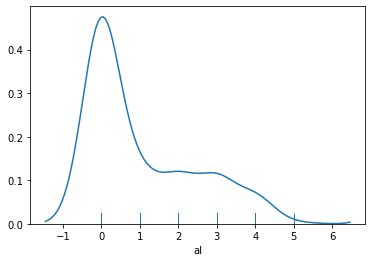

In [121]:
sns.distplot(data['al'],hist=False,rug=True)

In [124]:
data['al'].fillna(data['al'].median(),inplace=True)

In [132]:
data['su'].fillna(method='ffill',inplace=True)

In [138]:
data['rbc'].value_counts()

normal      144
abnormal     29
Name: rbc, dtype: int64